In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [2]:
house_data = pd.read_csv("../preprocessed_data/clean_data.csv")

In [3]:
house_data.head()

,Month,DayOfWeek,HourofDay,Day,HvacMode,Event,Schedule,T_ctrl,T_stp_heat,Humidity,auxHeat1,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out
0,1,1,0,1,heat,Hold,Sleep,70.0,70.0,37.0,0.0,165.0,70.0,0.0,67.0,0.0,41.0,95.0
1,1,1,0,1,heat,Hold,Sleep,70.0,70.0,37.0,30.0,135.0,70.0,0.0,67.0,0.0,41.0,95.0
2,1,1,0,1,heat,Hold,Sleep,70.0,70.0,37.0,300.0,300.0,70.0,0.0,67.0,0.0,41.0,95.0
3,1,1,0,1,heat,Hold,Sleep,70.0,70.0,37.0,135.0,180.0,70.0,0.0,67.0,0.0,41.0,95.0
4,1,1,0,1,heat,Hold,Sleep,70.0,70.0,37.0,0.0,120.0,70.0,0.0,67.0,0.0,41.0,95.0


In [4]:
#To check if Id's are Unique
print('Check if id is unique: ' + str(len(pd.unique(house_data.index)) == house_data.shape[0]))

Check if id is unique: True


#### Distribution Plot for T_ctrl

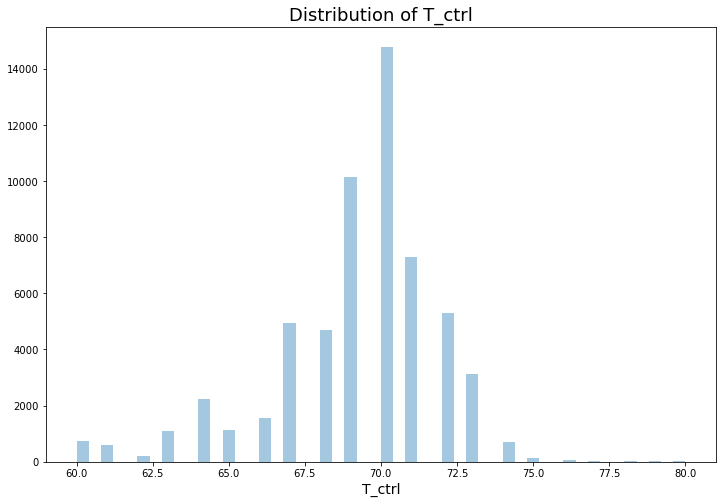

In [5]:
plt.figure(figsize = (12,8))
sns.distplot(house_data.T_ctrl.values,  kde = False)
plt.xlabel('T_ctrl', fontsize = 14)
plt.title('Distribution of T_ctrl', fontsize = 18)
plt.show()

#### Distribution Plot for Thermostat Temperature

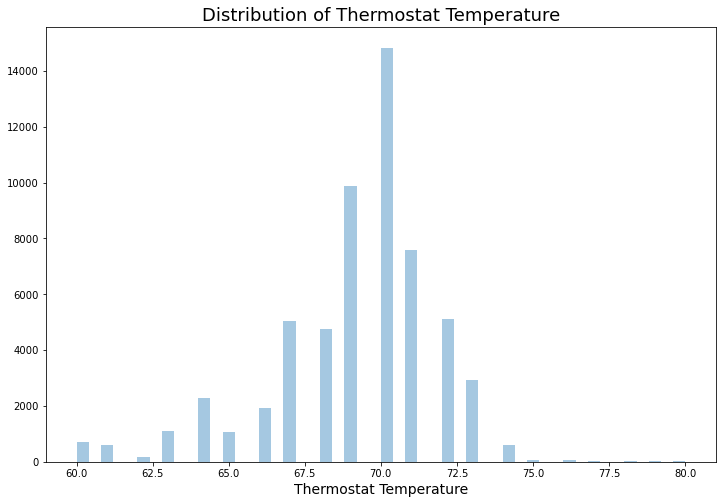

In [6]:
plt.figure(figsize = (12,8))
sns.distplot(house_data.Thermostat_Temperature.values,  kde = False)
plt.xlabel('Thermostat Temperature', fontsize = 14)
plt.title('Distribution of Thermostat Temperature', fontsize = 18)
plt.show()

#### Distribution Plot for T_stp_Heat

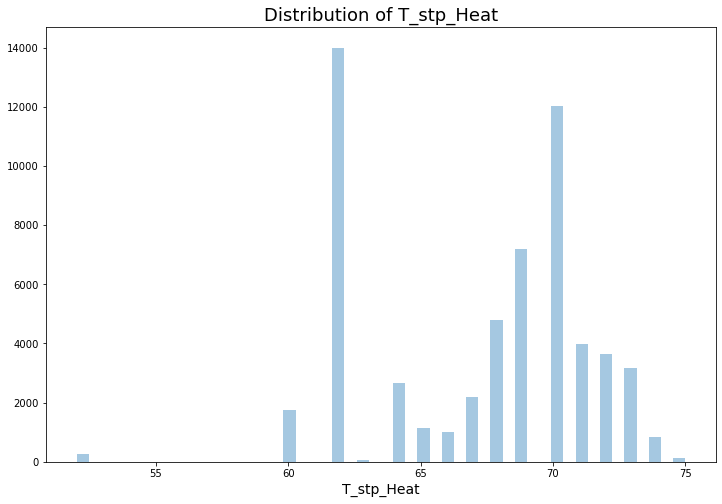

In [7]:
plt.figure(figsize = (12,8))
sns.distplot(house_data.T_stp_heat.values,  kde = False)
plt.xlabel('T_stp_Heat', fontsize = 14)
plt.title('Distribution of T_stp_Heat', fontsize = 18)
plt.show()

#### Distribution Plot for auxHeat1

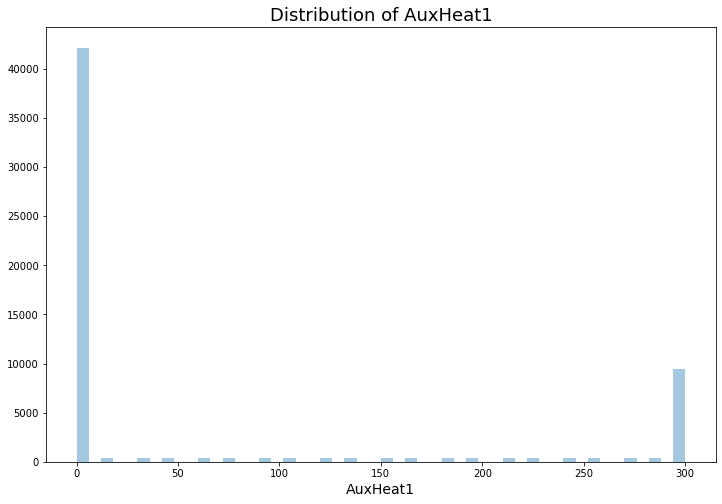

In [8]:
plt.figure(figsize = (12,8))
sns.distplot(house_data.auxHeat1.values,  kde = False)
plt.xlabel('AuxHeat1', fontsize = 14)
plt.title('Distribution of AuxHeat1', fontsize = 18)
plt.show()

#### Percentage Values for auxHeat1

Text(0, 0.5, 'Percentage Contribution in Dataset')

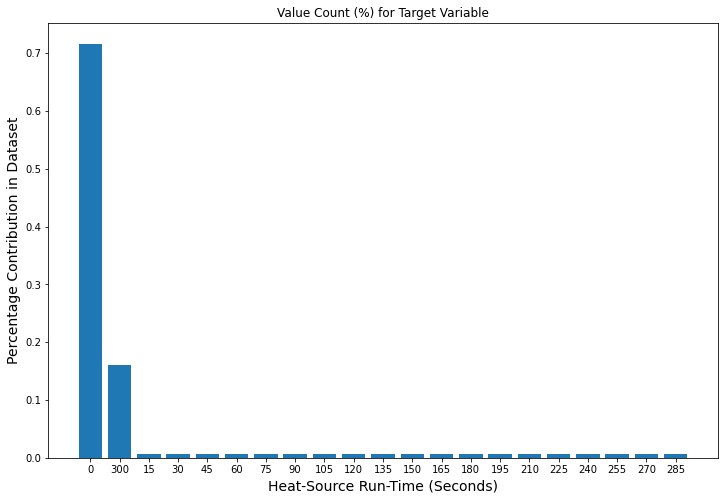

In [9]:
plt.figure(figsize = (12, 8))
plt.bar(x = ['0', '300', '15', '30', '45', '60', '75', '90', '105', '120', '135', 
             '150', '165', '180', '195', '210', '225', '240', '255', '270', '285'], height = house_data.auxHeat1.value_counts(normalize = True, 
                                                                                                                    ascending = False))
plt.title("Value Count (%) for Target Variable")
plt.xlabel("Heat-Source Run-Time (Seconds)", fontsize = 14)
plt.ylabel("Percentage Contribution in Dataset", fontsize = 14)

#### Distribution Plot for Humidity

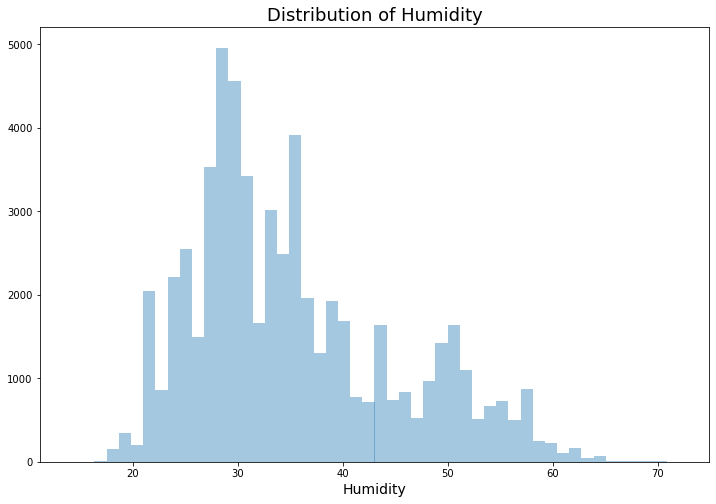

In [10]:
plt.figure(figsize = (12,8))
sns.distplot(house_data.Humidity.values,  kde = False)
plt.xlabel('Humidity', fontsize = 14)
plt.title('Distribution of Humidity', fontsize = 18)
plt.show()

#### Distribution Plot for Thermostat Motion

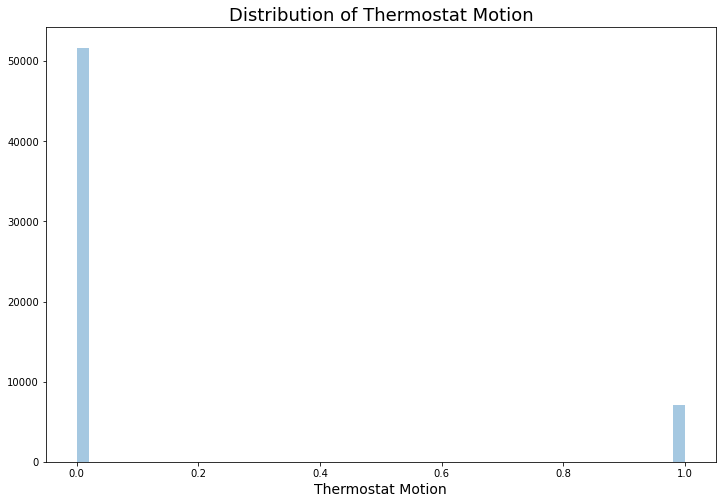

In [11]:
plt.figure(figsize = (12,8))
sns.distplot(house_data.Thermostat_Motion.values,  kde = False)
plt.xlabel('Thermostat Motion', fontsize = 14)
plt.title('Distribution of Thermostat Motion', fontsize = 18)
plt.show()

In [12]:
house_data.Thermostat_Motion.value_counts() / house_data.Thermostat_Motion.value_counts().sum()

0.0    0.878563
1.0    0.121437
Name: Thermostat_Motion, dtype: float64

#### Distribution Plot for T_out

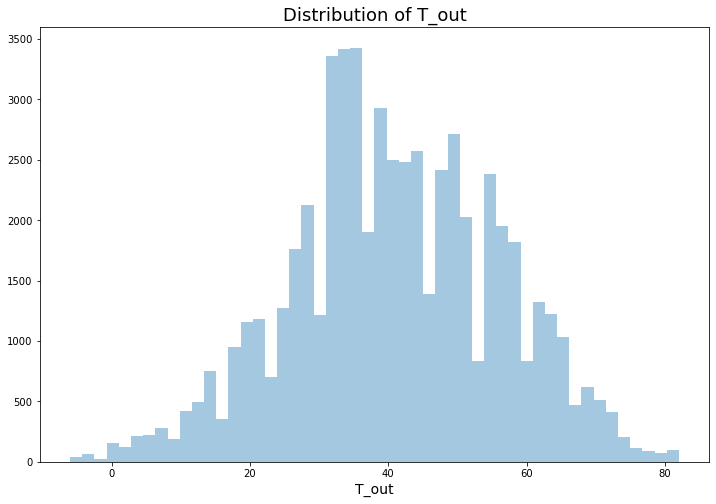

In [13]:
plt.figure(figsize = (12,8))
sns.distplot(house_data.T_out.values, kde = False)
plt.xlabel('T_out', fontsize = 14)
plt.title('Distribution of T_out', fontsize = 18)
plt.show()

#### Distribution Plot for RH_out

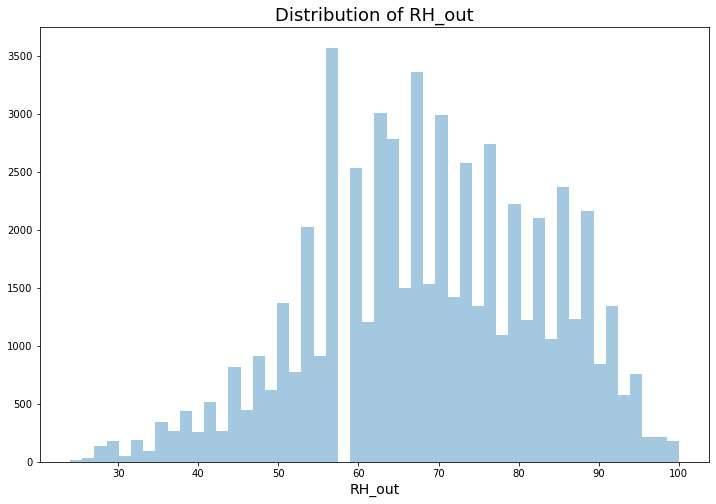

In [14]:
plt.figure(figsize = (12,8))
sns.distplot(house_data.RH_out.values,  kde = False)
plt.xlabel('RH_out', fontsize = 14)
plt.title('Distribution of RH_out', fontsize = 18)
plt.show()

In [15]:
house_data.Event.value_counts()

Hold    37515
None    21322
Name: Event, dtype: int64

In [16]:
house_data.Schedule.value_counts()

Away     22498
Home     18565
Sleep    17774
Name: Schedule, dtype: int64

In [17]:
month_num_count = house_data.groupby('Month').size().reset_index()

In [18]:
month_num_count

,Month,0
0,1,6797
1,2,4131
2,3,7132
3,4,7267
4,5,7123
5,6,5986
6,9,96
7,10,6343
8,11,6837
9,12,7125


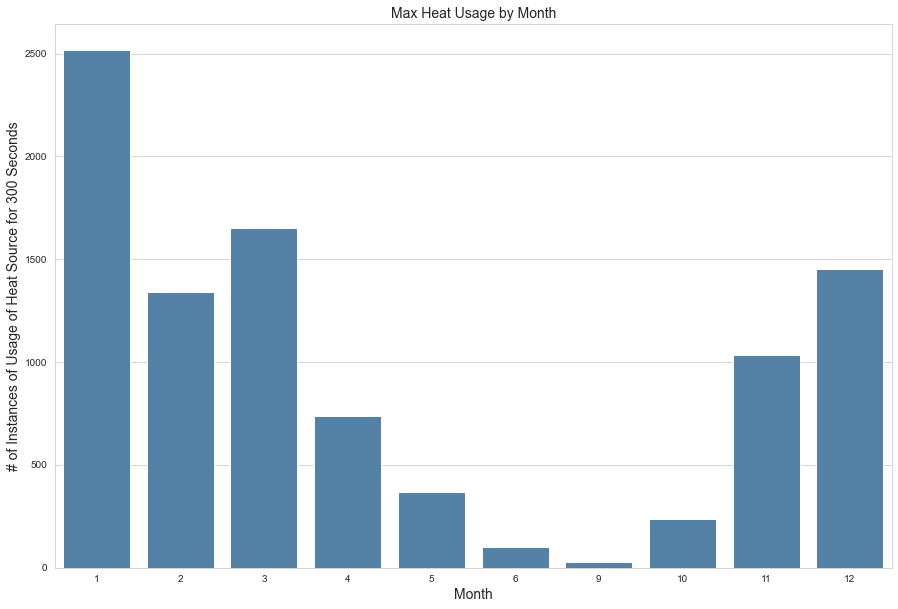

In [19]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

#Using Seaborn Countplot
heatUsage = sns.countplot(data = house_data[house_data['auxHeat1'] == 300.0], x = 'Month', color = 'steelblue')

heatUsage.set_xlabel("Month", fontsize = 14)
heatUsage.set_ylabel('# of Instances of Usage of Heat Source for 300 Seconds', fontsize = 14)
plt.title('Max Heat Usage by Month', fontsize = 14)
plt.show()

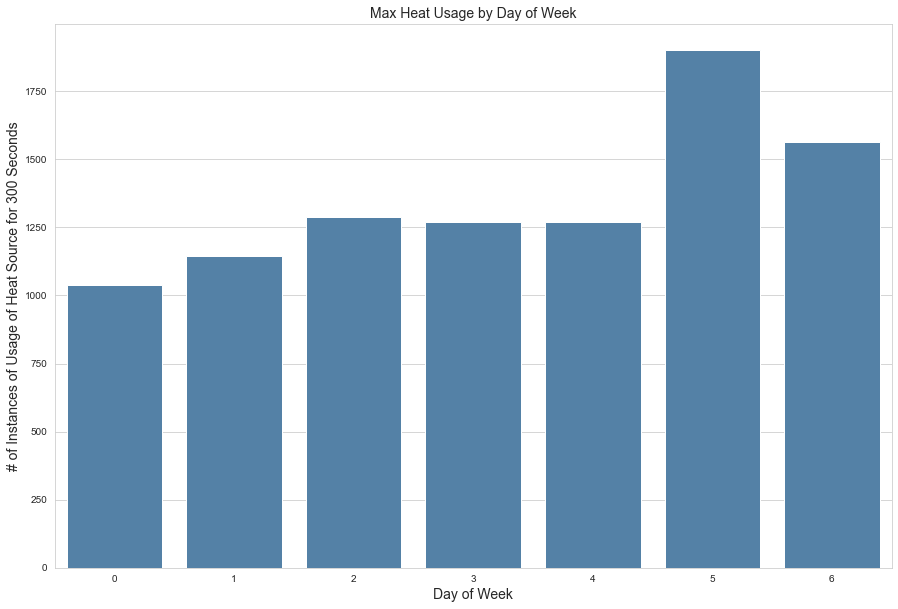

In [20]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

#Using Seaborn Countplot
heatUsage = sns.countplot(data = house_data[house_data['auxHeat1'] == 300.0], x = 'DayOfWeek', color = 'steelblue')

heatUsage.set_xlabel("Day of Week", fontsize = 14)
heatUsage.set_ylabel('# of Instances of Usage of Heat Source for 300 Seconds', fontsize = 14)
plt.title('Max Heat Usage by Day of Week', fontsize = 14)
plt.show()

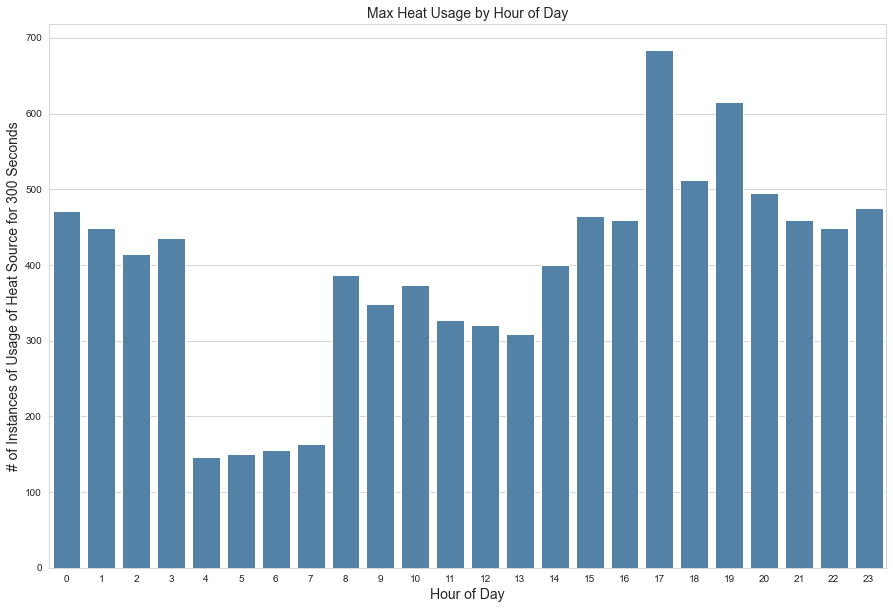

In [21]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

#Using Seaborn Countplot
heatUsage = sns.countplot(data = house_data[house_data['auxHeat1'] == 300.0], x = 'HourofDay', color = 'steelblue')


heatUsage.set_xlabel("Hour of Day", fontsize = 14)
heatUsage.set_ylabel('# of Instances of Usage of Heat Source for 300 Seconds', fontsize = 14)
plt.title('Max Heat Usage by Hour of Day', fontsize = 14)
plt.show()

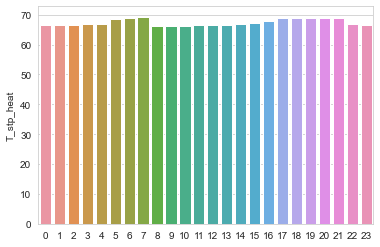

In [22]:
sns.barplot(x = np.arange(0, 24), y = house_data.groupby(by = "HourofDay")['T_stp_heat'].mean())

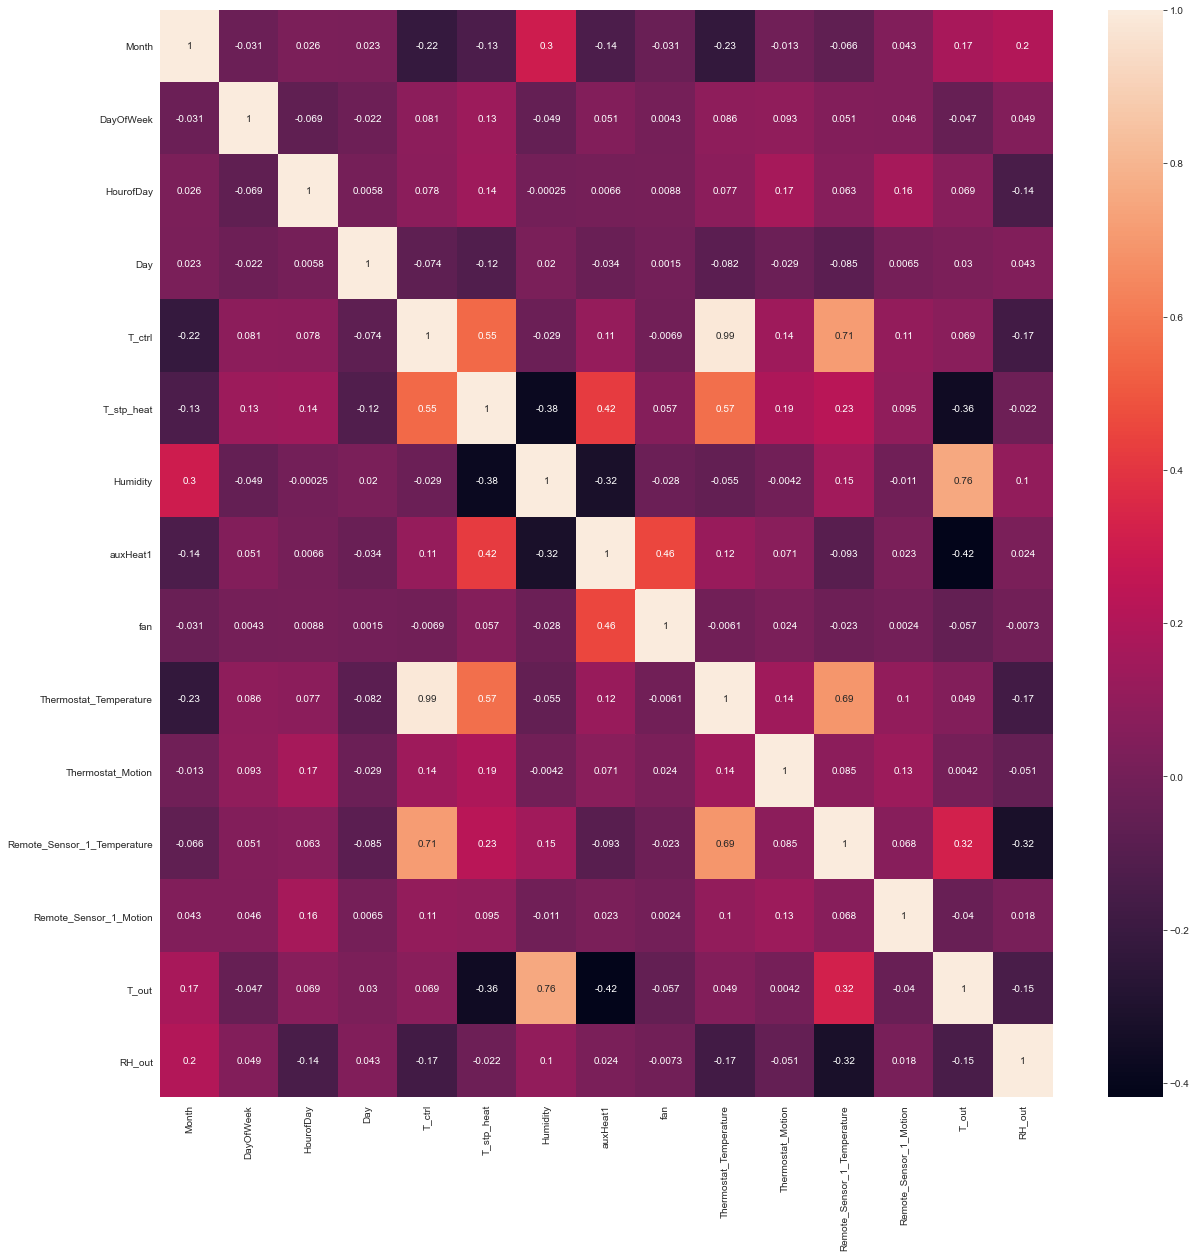

In [23]:
plt.figure(figsize = (20, 20))
sns.heatmap(house_data.corr(), annot = True)

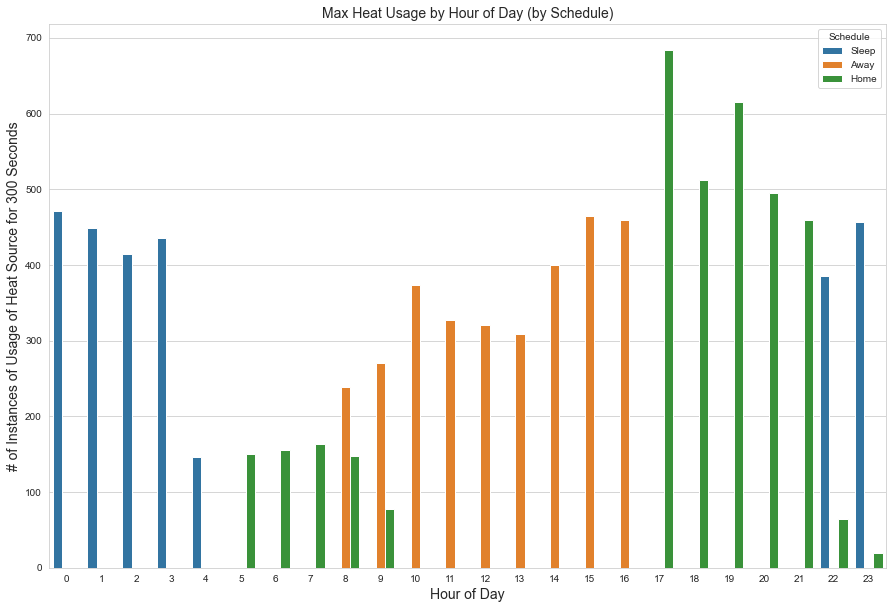

In [24]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

#Using Seaborn Countplot
heatUsage = sns.countplot(data = house_data[house_data['auxHeat1'] == 300.0], x = 'HourofDay', hue = 'Schedule')

heatUsage.set_xlabel("Hour of Day", fontsize = 14)
heatUsage.set_ylabel('# of Instances of Usage of Heat Source for 300 Seconds', fontsize = 14)
plt.title('Max Heat Usage by Hour of Day (by Schedule)', fontsize = 14)

plt.show()

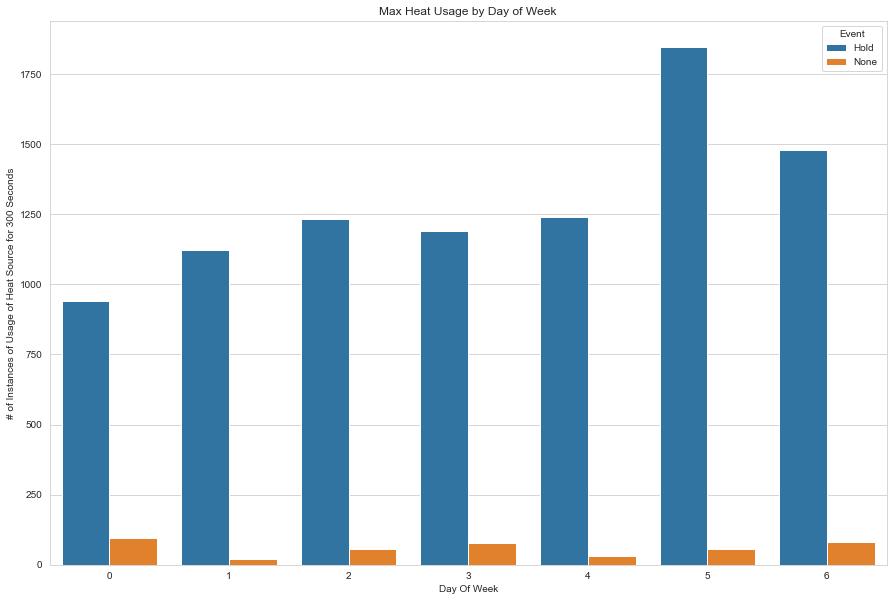

In [25]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

#Using Seaborn Countplot
heatUsage = sns.countplot(data = house_data[house_data['auxHeat1'] == 300.0], x = 'DayOfWeek', hue = 'Event')

heatUsage.set(xlabel = 'Day Of Week', ylabel = '# of Instances of Usage of Heat Source for 300 Seconds')
plt.title('Max Heat Usage by Day of Week')
plt.show()

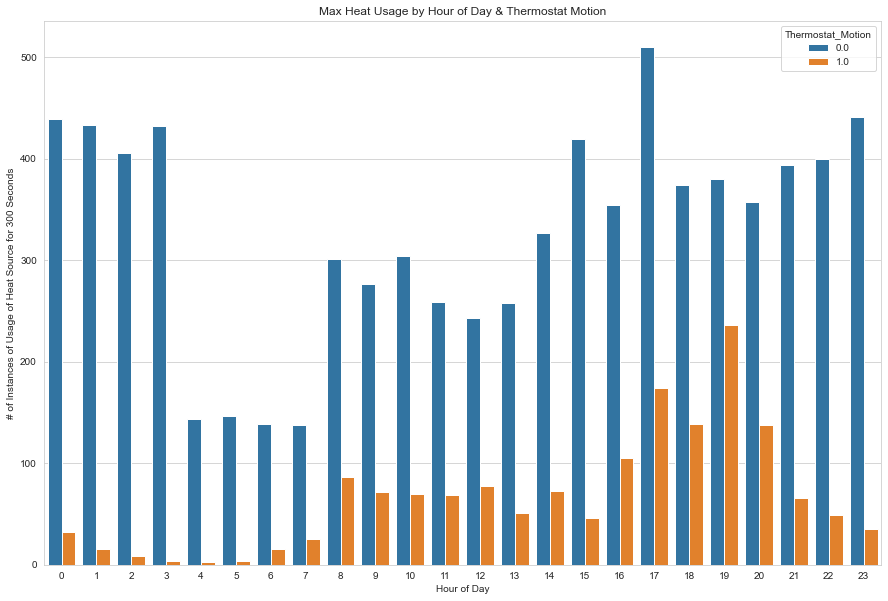

In [26]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

#Using Seaborn Countplot
heatUsage = sns.countplot(data = house_data[house_data['auxHeat1'] == 300.0], x = 'HourofDay', hue = 'Thermostat_Motion')

heatUsage.set(xlabel = 'Hour of Day', ylabel = '# of Instances of Usage of Heat Source for 300 Seconds')
plt.title('Max Heat Usage by Hour of Day & Thermostat Motion')
plt.show()

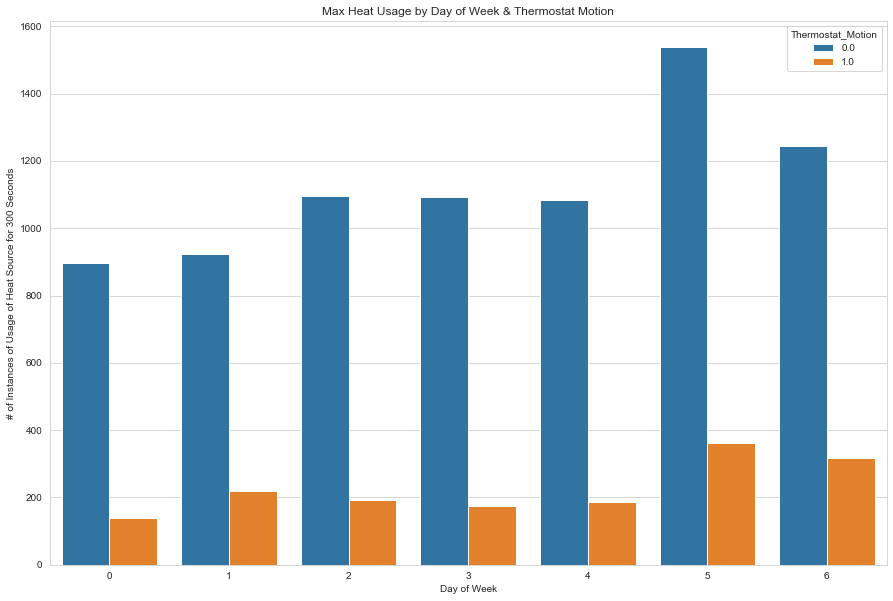

In [27]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

#Using Seaborn Countplot
heatUsage = sns.countplot(data = house_data[house_data['auxHeat1'] == 300.0], x = 'DayOfWeek', hue = 'Thermostat_Motion')

heatUsage.set(xlabel = 'Day of Week', ylabel = '# of Instances of Usage of Heat Source for 300 Seconds')
plt.title('Max Heat Usage by Day of Week & Thermostat Motion')
plt.show()

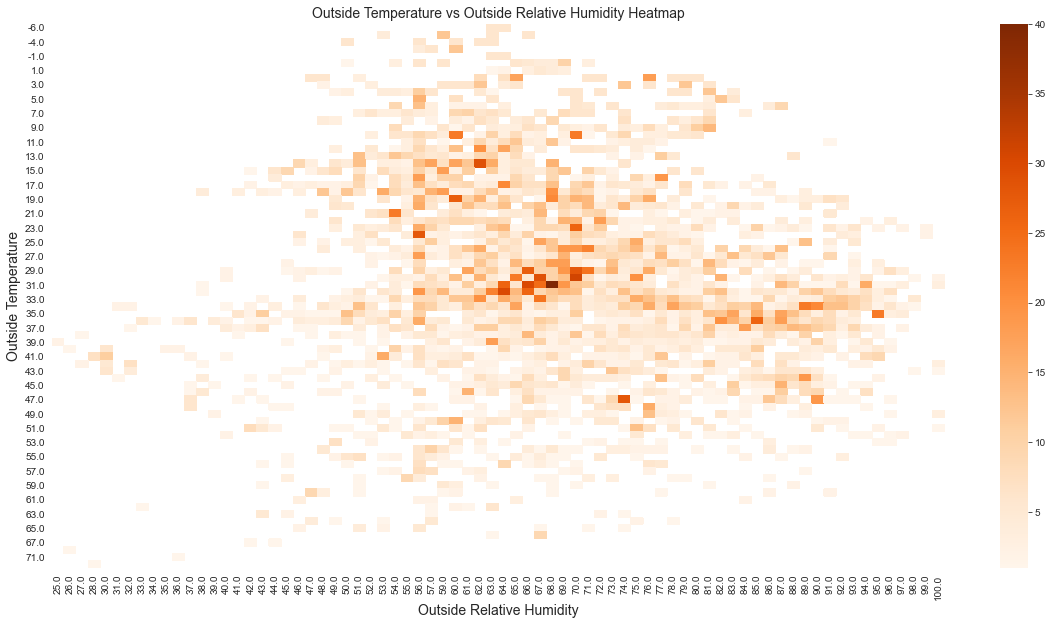

In [28]:
daily_activity_member = house_data[house_data['auxHeat1'] == 300.0].groupby(by = ['T_out', 'RH_out']).count()['auxHeat1'].unstack()

plt.figure(figsize = (20, 10))

sns.heatmap(daily_activity_member, cmap = 'Oranges')

plt.title('Outside Temperature vs Outside Relative Humidity Heatmap', fontsize = 14)
plt.xlabel('Outside Relative Humidity', fontsize = 14)
plt.ylabel('Outside Temperature', fontsize = 14)
plt.show()

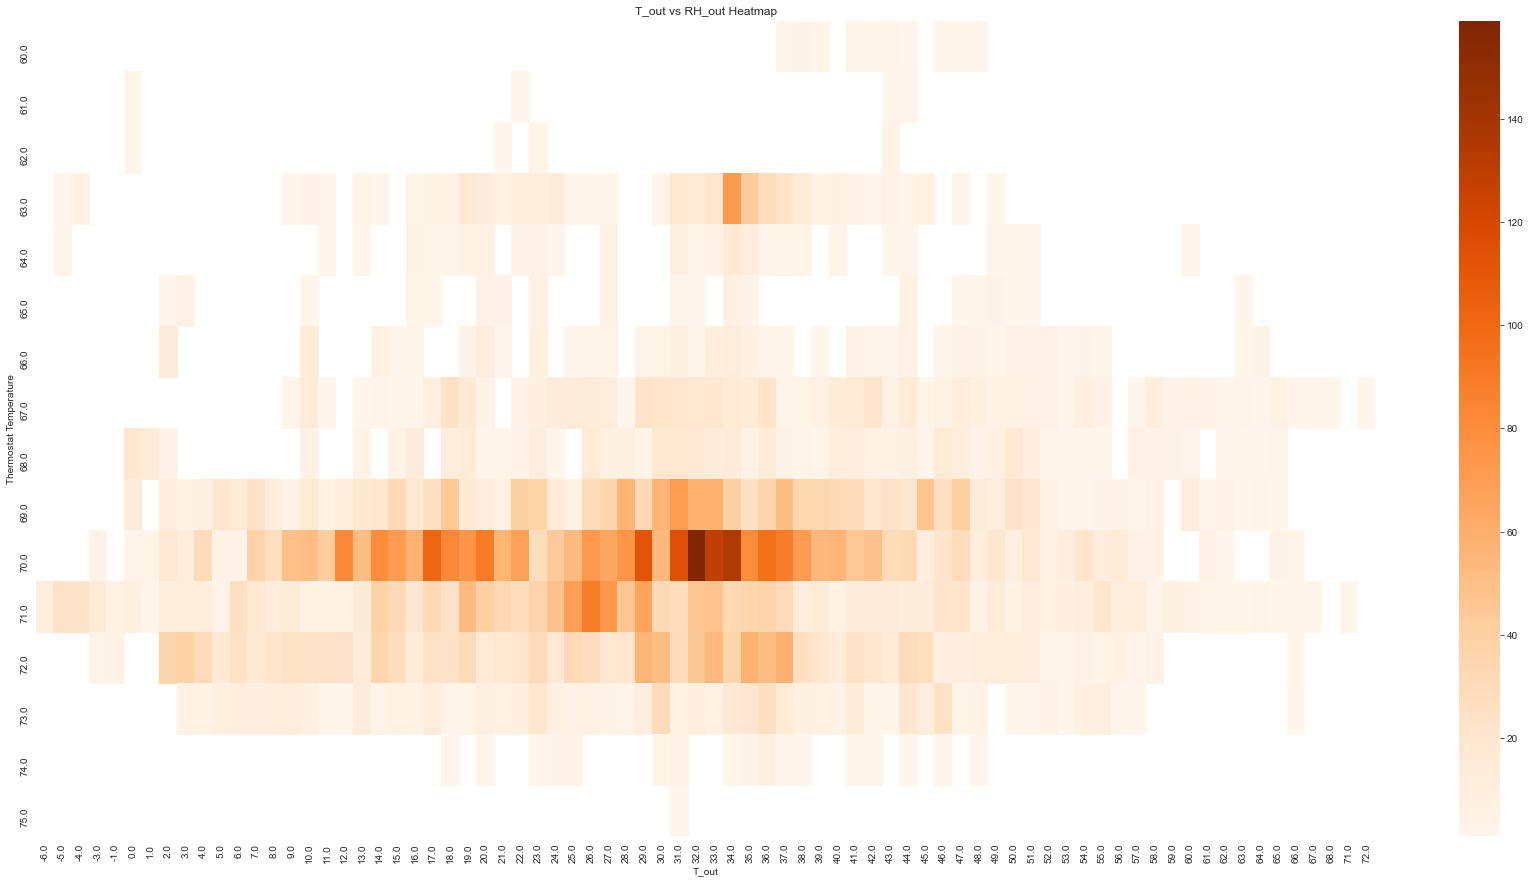

In [29]:
daily_activity_member = house_data[house_data['auxHeat1'] == 300.0].groupby(by = ['Thermostat_Temperature', 'T_out']).count()['auxHeat1'].unstack()

plt.figure(figsize = (30, 15))

sns.heatmap(daily_activity_member, cmap = 'Oranges')

plt.title('T_out vs RH_out Heatmap')
plt.xlabel('T_out')
plt.ylabel('Thermostat Temperature')
plt.show()

In [30]:
house_data.shape

(58837, 18)

In [32]:
from statsmodels.graphics.tsaplots import plot_acf

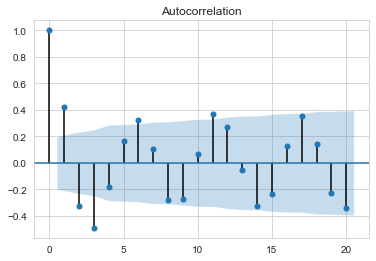

In [33]:
plot_acf(house_data.auxHeat1[:96])
plt.show()